$$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 20165549\ \ JANG\ \ JAE\ \ YONG$$

**Apply K-means algorithm to image $f(x)$ based on its color value with given number of clusters $K$ and visualize the progress of optimization and results of the algorithm for each selected number of clusters $K$.**

* Select any color image that consists of distinctive regions with different colors.

(1194, 1640)


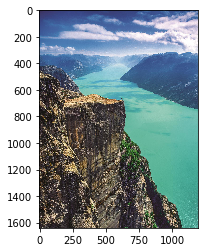

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

im = Image.open("testim1.jpg")  # 1194*1640 image
im_array = np.array(im)

size_row	= im.size[1]    # height of the image
size_col  	= im.size[0]    # width of the image

size_image	= size_row * size_col

#
# Distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    r = np.sqrt(d)
    s = np.sum(r)

    return(s)

#
# make a matrix of result image
#
result_image = im_array.copy()



print(im.size)
plt.imshow(im_array)

$$[Selected\ \ image]$$

**[K-means Algorithm]**

In [4]:
def K_Means_Algorithm(k):
    
    # Get random label
    rand_label = np.random.randint(0, k, size_image)
    list_label = np.empty((size_row, size_col), dtype=int)
    
    for i in range(size_row):
        for j in range(size_col):
            list_label[i, j] = rand_label[(i+1)*j]

            
    # make a matrix of centroid
    # (RGB, K) 
    centroid = np.zeros((3, k), dtype=float) 
    # make a matrix of iteration
    iteration = np.zeros((3, k), dtype=float)
    count = np.zeros((3, k), dtype=float)
 
    #
    # Initial label
    #
    for i in range(size_row):
        for j in range(size_col):
            centroid[:, list_label[i, j]] += im_array[i, j, :]
            count[: ,list_label[i, j]] += 1
    
    centroid /= count
    count *= 0
    
    
    list_distance = np.empty(k, dtype=float)
    dist_sum = np.zeros(k, dtype=float)
    energy_list = np.zeros(11 , dtype=float)
        
    #
    # Iterating 10 times.
    #
    for iterate in range(11):

        for i in range(size_row):
            for j in range(size_col):
                x = im_array[i, j, :]
                for t in range(k):
                    y = centroid[:, t]
                    list_distance[t] = distance(x, y)
                
                min_value = min(list_distance)
                distance_index = np.where(list_distance == min_value)
                iteration[:, int(distance_index[0])] += x
                count[:, int(distance_index[0])] += 1            
                dist_sum[int(distance_index[0])] += min_value
                list_label[i, j] = int(distance_index[0])
            
        #
        # compute Centroid
        #
        centroid = iteration.copy()
        centroid = centroid / count
        
        #
        # compute Energy
        #
        energy_sum = dist_sum.sum()
        energy_sum /= size_image
        energy_list[iterate] = energy_sum
        
        #
        # initialize
        #
        dist_sum *= 0
        energy_sum = 0
        
        iteration *= 0
        count *= 0
    
    #
    # Plot input image in color.
    #
    for i in range(size_row):
        for j in range(size_col):
            result_image[i, j, :] = centroid[:, list_label[i, j]]
    
    return np.array(energy_list)
    # Return Energy

**[Energy]**

$\frac{1}{n} \sum_{x \in \Omega} \| f(x) - m_c \|^2,$

where $\Omega$ denotes the image domain and the number of pixels $| \Omega |$ is $n$, and $m_c$ denotes the centroid for cluster $c$ that is the cluster label of $f(x)$.

* Plot the energy curve for each K.

In [5]:
def Energy():
    
    x = range(11)       # Iterating 10 times.
    y = E[x]            # Energy per optimization iteration.
    plt.plot(x, y, "RED")
    plt.title('Energy')
    plt.xlabel('Iterations')
    plt.ylabel('Energy')
    
    plt.show()

**[Visualisation]**

* Apply K-means algorithm to the given image with at least 4 different choice of $K$.

* For each $K$, plot the energy curve and the result image.

# . Results of running the K-means with $K = 2$

In [19]:
k = 2
E = K_Means_Algorithm(k)

Plot the energy curve for $K = 2$.

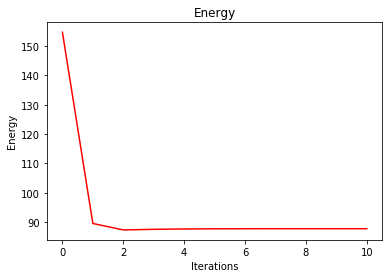

In [20]:
Energy()

Output image for $K = 2$

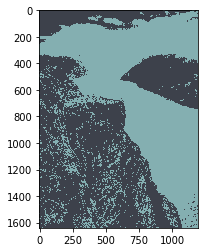

In [21]:
plt.imshow(result_image)

# . Results of running the K-means with $K = 3$

In [50]:
k = 3
E = K_Means_Algorithm(k)

Plot the energy curve for $K = 3$.

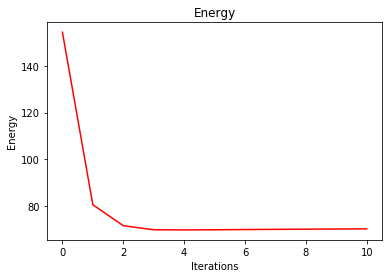

In [51]:
Energy()

Output image for $K = 3$

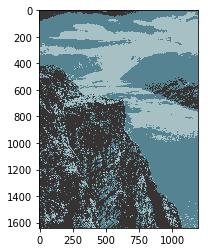

In [52]:
plt.imshow(result_image)

# . Results of running the K-means with $K = 4$

In [8]:
k = 4
E = K_Means_Algorithm(k)

Plot the energy curve for $K = 4$.

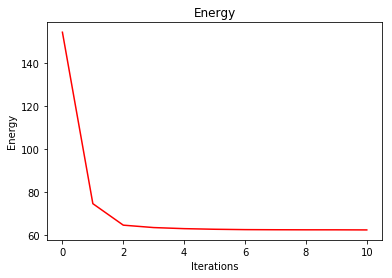

In [9]:
Energy()

Output image for $K = 4$

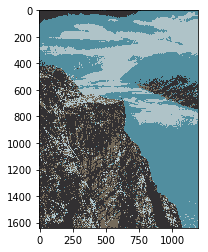

In [10]:
plt.imshow(result_image)

# . Results of running the K-means with $K = 5$

In [35]:
k = 5
E = K_Means_Algorithm(k)

Plot the energy curve for $K = 5$.

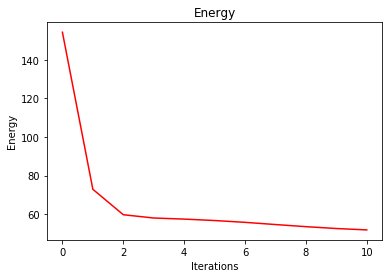

In [36]:
Energy()

Output image for $K = 5$

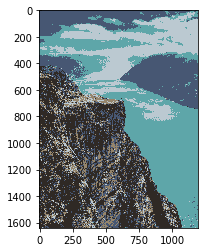

In [37]:
plt.imshow(result_image)